```ipython3
python3 -m pip install -e git+https://github.com/huiwengoh/crowd-kit.git#egg=crowd-kit 
python3 -m pip install -e git+https://github.com/huiwengoh/cleanlab.git@multiannotator-benchmark#egg=cleanlab 
```

In [1]:
import numpy as np
import pandas as pd

from cleanlab.multiannotator import get_label_quality_multiannotator
from benchmark_functions import benchmark_results

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data(folder_path):
    multiannotator_labels = np.load(f"{folder_path}/c10h_labels.npy")
    true_labels = np.load(f"{folder_path}/true_labels.npy")
    pred_probs_resnet18 = np.load(f"{folder_path}/pred_probs_resnet18.npy")
    pred_probs_swin = np.load(f"{folder_path}/pred_probs_swin.npy")
    pred_probs_truelabels = np.load(f"{folder_path}/pred_probs_truelabels.npy")
    
    return multiannotator_labels, true_labels, pred_probs_resnet18, pred_probs_swin, pred_probs_truelabels

In [3]:
methods = [
    ("majority", "crowdlab"),
    ("majority", "label_quality_score"),
    ("majority", "agreement"),
    ("majority", "active_label_cleaning"),
    ("majority", "empirical_bayes"),
    ("majority", "no_perannotator_weights"),
    ("dawid_skene", "dawid_skene"),
    ("glad", "glad"),
]

model_methods = [
    ("dawid_skene", "dawid_skene"),
    ("glad", "glad"),
]

## Worst Annotators Dataset

In [4]:
folder_path = "benchmark_data/worst_annotators"
multiannotator_labels, true_labels, pred_probs_resnet18, pred_probs_swin, pred_probs_truelabels = load_data(folder_path)

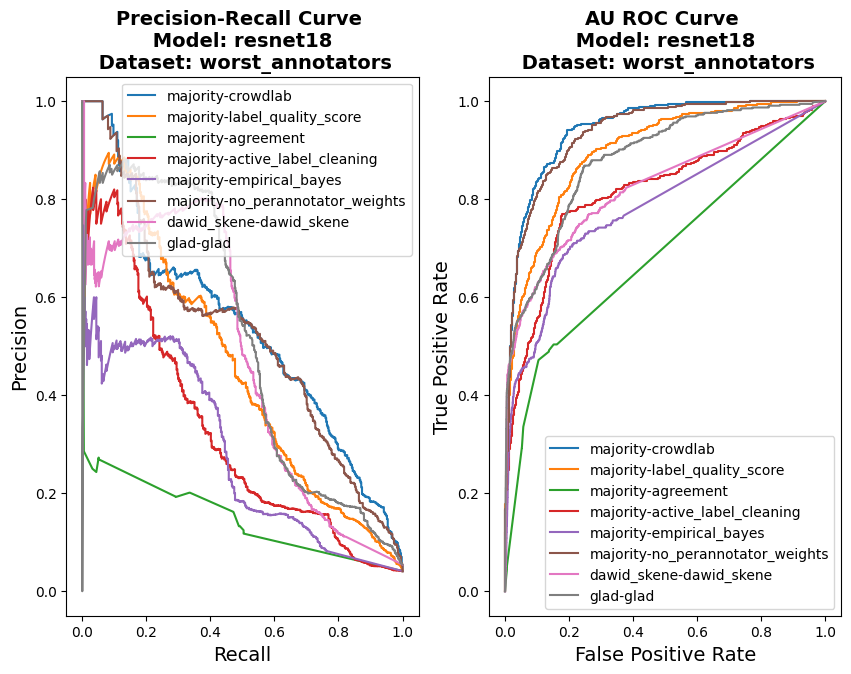

In [5]:
results_worst_resnet = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, methods, "resnet18", "worst_annotators")

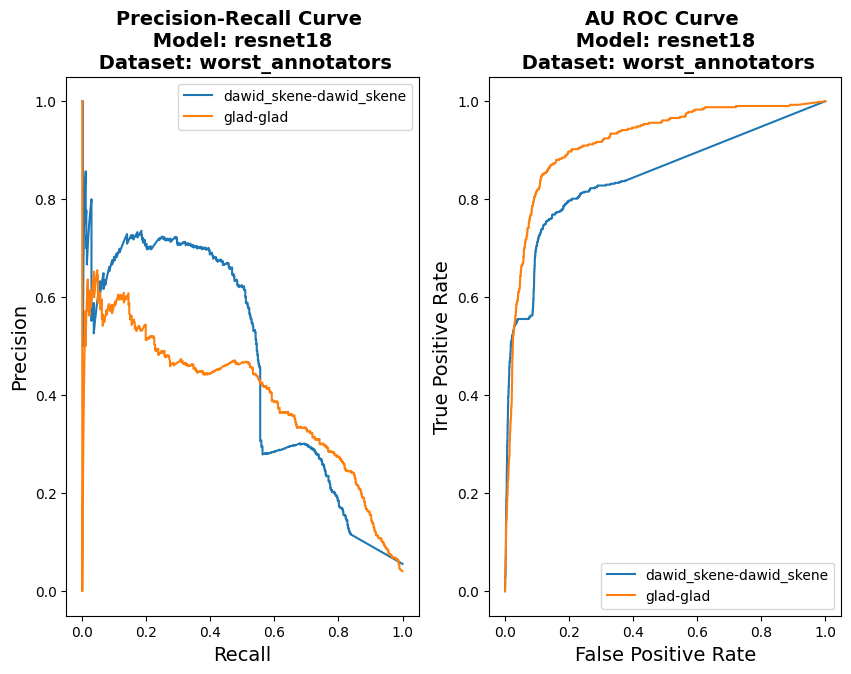

In [6]:
model_labels = np.argmax(pred_probs_resnet18, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_worst_resnet_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, model_methods, "resnet18", "worst_annotators")

for res in results_worst_resnet_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

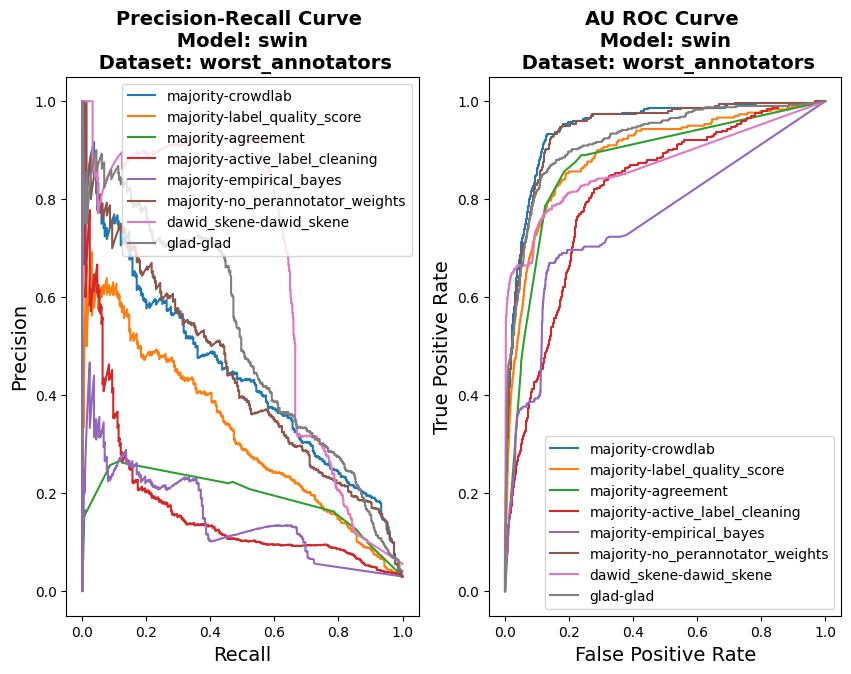

In [7]:
results_worst_swin = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, methods, "swin", "worst_annotators")

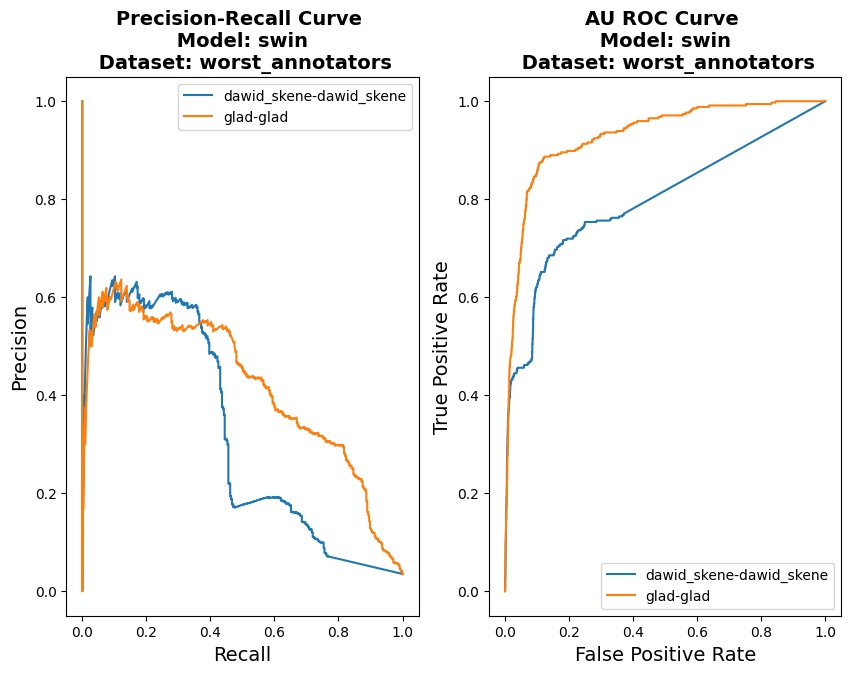

In [8]:
model_labels = np.argmax(pred_probs_swin, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_worst_swin_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, model_methods, "swin", "worst_annotators")

for res in results_worst_swin_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

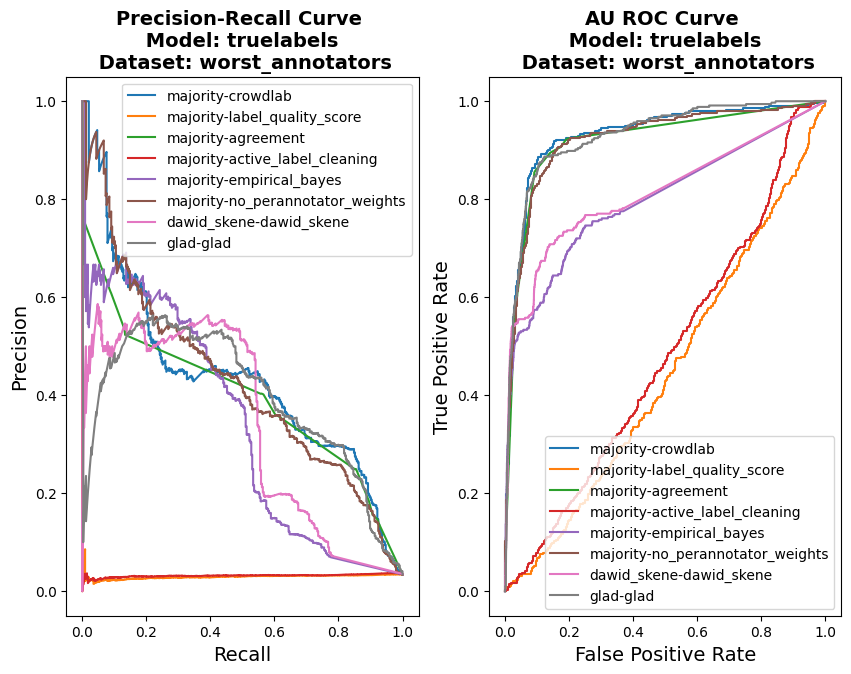

In [9]:
results_worst_truelabels = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, methods, "truelabels", "worst_annotators")

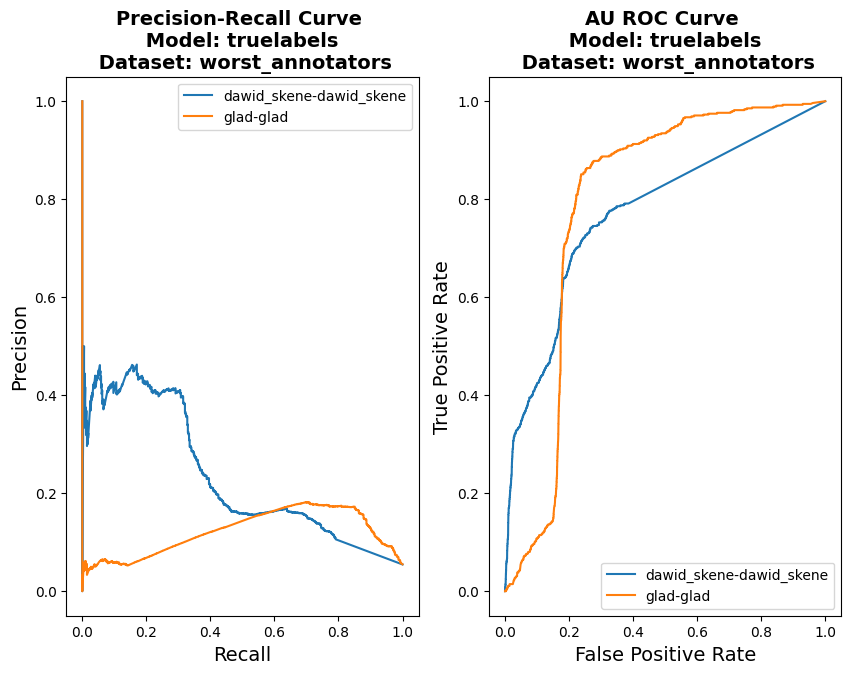

In [10]:
model_labels = np.argmax(pred_probs_truelabels, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_worst_truelabels_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, model_methods, "truelabels", "worst_annotators")

for res in results_worst_truelabels_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

In [11]:
results_worst = pd.concat(
    [
        pd.DataFrame(results_worst_resnet),
        pd.DataFrame(results_worst_resnet_model),
        pd.DataFrame(results_worst_swin),
        pd.DataFrame(results_worst_swin_model),
        pd.DataFrame(results_worst_truelabels),
        pd.DataFrame(results_worst_truelabels_model),
    ],
    ignore_index=True,
)

results_worst

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,worst_annotators,resnet18,majority,crowdlab,0.944894,0.537992,0.9589,0.721502,24.330900,22.384428,17.761557,14.274128,11.824818,7.761557
1,worst_annotators,resnet18,majority,label_quality_score,0.898247,0.448911,0.9589,0.701059,19.464720,21.411192,19.221411,13.381995,10.218978,6.496350
2,worst_annotators,resnet18,majority,agreement,0.686879,0.147983,0.9589,0.688119,4.866180,5.839416,6.326034,5.271695,4.720195,4.282238
3,worst_annotators,resnet18,majority,active_label_cleaning,0.816071,0.325016,0.9589,0.701059,17.031630,19.951338,16.301703,10.218978,7.883212,5.158151
4,worst_annotators,resnet18,majority,empirical_bayes,0.783923,0.279858,0.9589,0.709135,12.165450,11.678832,12.165450,11.273317,8.564477,4.768856
5,worst_annotators,resnet18,majority,no_perannotator_weights,0.937207,0.520520,0.9589,0.712983,24.330900,21.897810,18.248175,13.949716,11.922141,7.542579
6,worst_annotators,resnet18,dawid_skene,dawid_skene,0.825211,0.464161,0.9457,0.596159,12.891344,11.786372,13.443831,14.487416,9.760589,5.874770
7,worst_annotators,resnet18,glad,glad,0.881579,0.512185,0.9452,0.667293,14.598540,15.693431,15.875912,13.929440,9.963504,5.912409
8,worst_annotators,resnet18,dawid_skene_with_model,dawid_skene,0.846500,0.462716,0.9442,0.664029,12.544803,11.111111,12.724014,12.544803,10.358423,5.555556
9,worst_annotators,resnet18,glad_with_model,glad,0.918314,0.394088,0.9591,0.718595,14.669927,13.691932,14.425428,11.246944,10.806846,7.408313


In [12]:
# pd.DataFrame(results_worst).to_csv("benchmark_results/results_worst.csv", index=False)

## Uniform 1-5 Annotations Dataset

In [13]:
folder_path = "benchmark_data/uniform_1_5"
multiannotator_labels, true_labels, pred_probs_resnet18, pred_probs_swin, pred_probs_truelabels = load_data(folder_path)

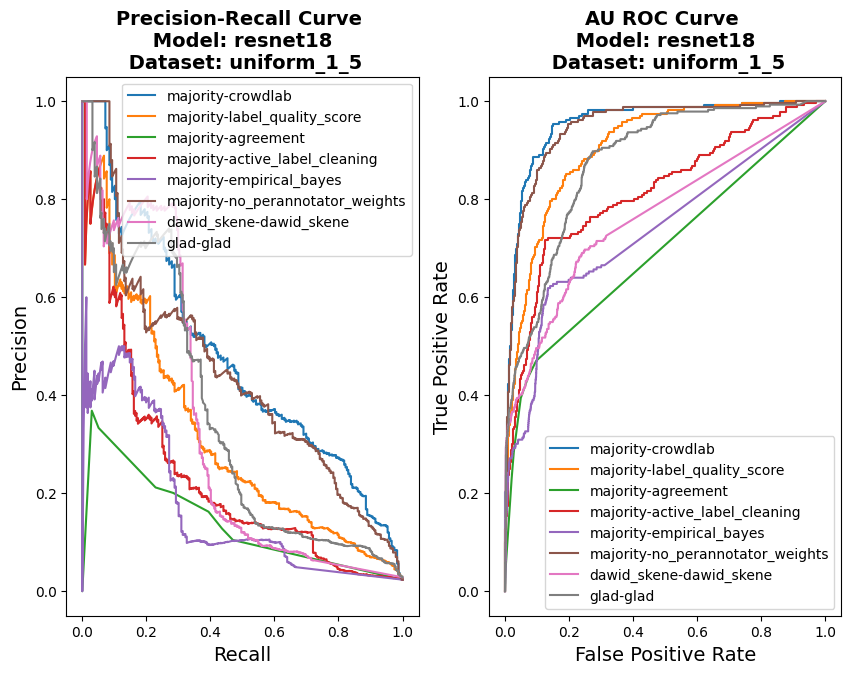

In [14]:
results_uniform_resnet = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, methods, "resnet18", "uniform_1_5")

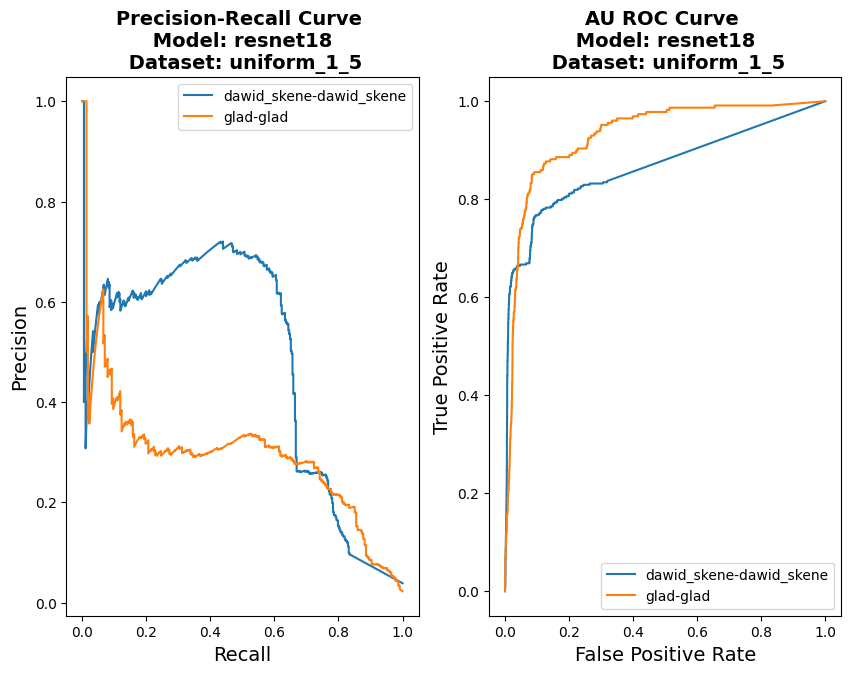

In [15]:
model_labels = np.argmax(pred_probs_resnet18, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_uniform_resnet_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, model_methods, "resnet18", "uniform_1_5")

for res in results_uniform_resnet_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

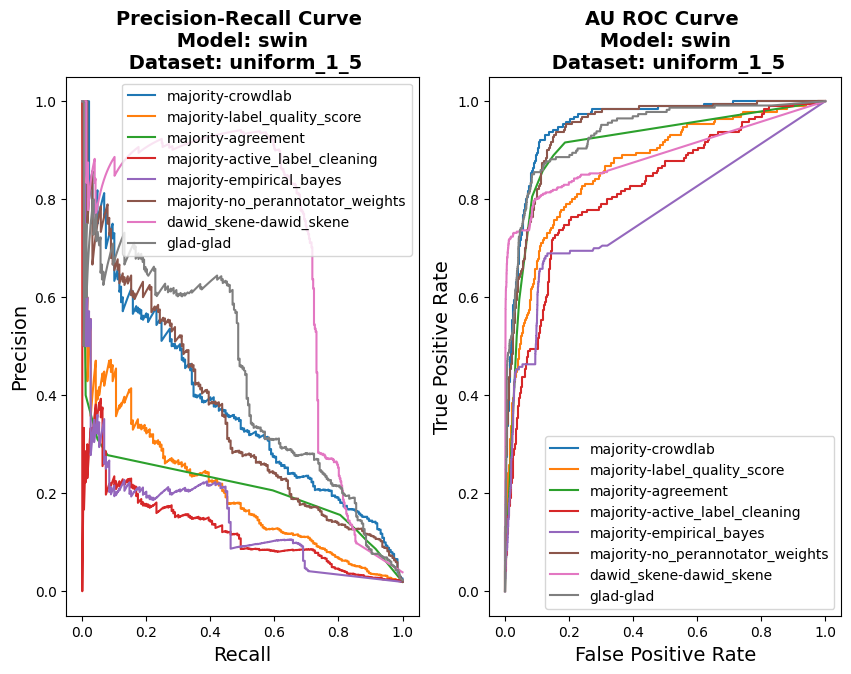

In [16]:
results_uniform_swin = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, methods, "swin", "uniform_1_5")

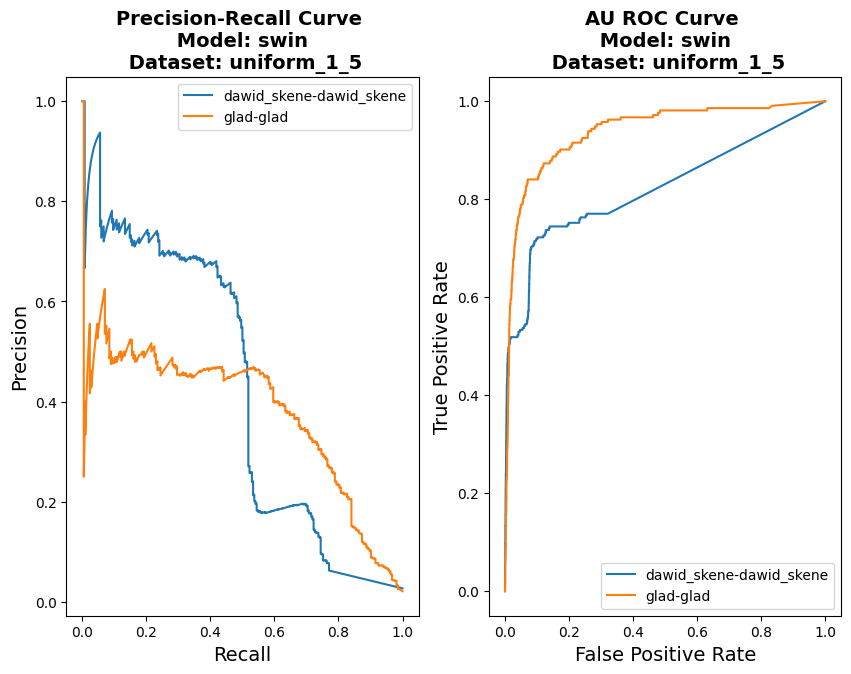

In [17]:
model_labels = np.argmax(pred_probs_swin, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_uniform_swin_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, model_methods, "swin", "uniform_1_5")

for res in results_uniform_swin_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

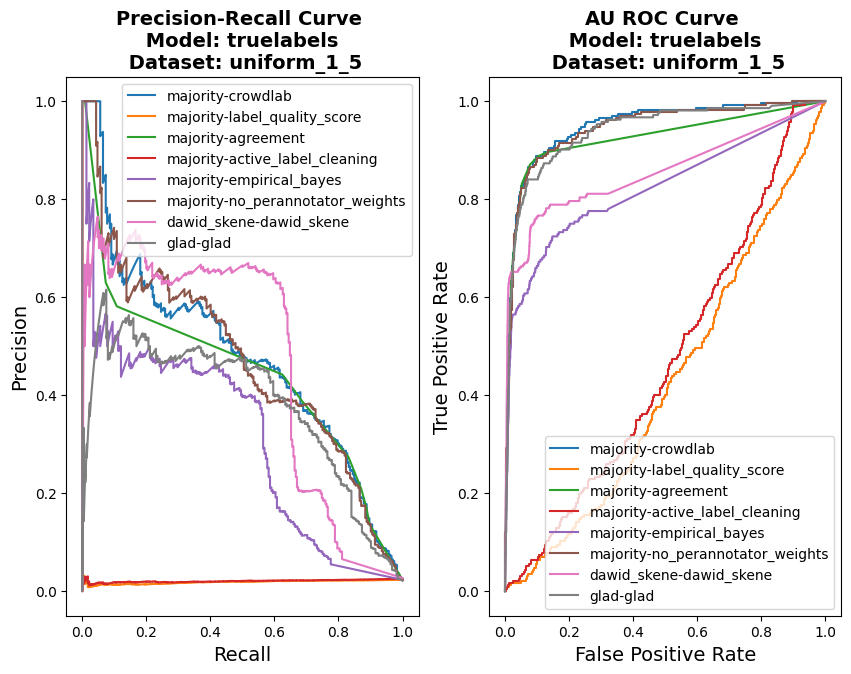

In [18]:
results_uniform_truelabels = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, methods, "truelabels", "uniform_1_5")

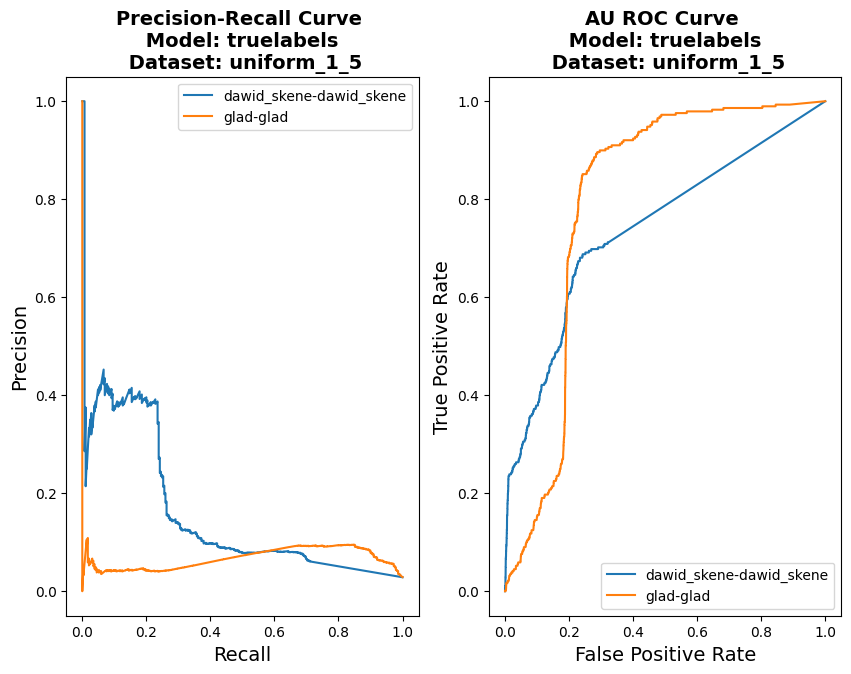

In [19]:
model_labels = np.argmax(pred_probs_truelabels, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_uniform_truelabels_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, model_methods, "truelabels", "uniform_1_5")

for res in results_uniform_truelabels_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

In [20]:
results_uniform = pd.concat(
    [
        pd.DataFrame(results_uniform_resnet),
        pd.DataFrame(results_uniform_resnet_model),
        pd.DataFrame(results_uniform_swin),
        pd.DataFrame(results_uniform_swin_model),
        pd.DataFrame(results_uniform_truelabels),
        pd.DataFrame(results_uniform_truelabels_model),
    ],
    ignore_index=True,
)

results_uniform

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,uniform_1_5,resnet18,majority,crowdlab,0.955229,0.477134,0.9764,0.823285,42.372881,33.050847,27.966102,16.949153,13.813559,8.644068
1,uniform_1_5,resnet18,majority,label_quality_score,0.905568,0.313491,0.9764,0.769739,33.898305,26.271186,22.457627,12.429379,9.745763,6.779661
2,uniform_1_5,resnet18,majority,agreement,0.696294,0.136764,0.9764,0.823396,21.186441,11.864407,9.745763,9.039548,7.118644,4.618644
3,uniform_1_5,resnet18,majority,active_label_cleaning,0.813913,0.232223,0.9764,0.769739,33.898305,24.576271,16.101695,10.028249,7.881356,5.593220
4,uniform_1_5,resnet18,majority,empirical_bayes,0.737146,0.167983,0.9764,0.829321,16.949153,19.491525,17.372881,9.604520,6.186441,4.025424
5,uniform_1_5,resnet18,majority,no_perannotator_weights,0.947245,0.439249,0.9764,0.811771,42.372881,27.118644,23.305085,17.090395,13.220339,8.093220
6,uniform_1_5,resnet18,dawid_skene,dawid_skene,0.765943,0.328632,0.9716,0.763823,31.690141,27.464789,27.816901,12.089202,7.887324,4.753521
7,uniform_1_5,resnet18,glad,glad,0.878161,0.350627,0.9716,0.801329,31.690141,22.535211,25.704225,13.028169,9.225352,5.316901
8,uniform_1_5,resnet18,dawid_skene_with_model,dawid_skene,0.866305,0.474493,0.9613,0.753465,10.335917,16.537468,16.020672,17.829457,13.023256,6.770026
9,uniform_1_5,resnet18,glad_with_model,glad,0.931200,0.290998,0.9772,0.841693,17.543860,18.421053,15.789474,13.011696,12.719298,8.333333


In [21]:
# pd.DataFrame(results_uniform).to_csv("benchmark_results/results_uniform.csv", index=False)

## Complete Dataset

In [22]:
folder_path = "benchmark_data/complete"
multiannotator_labels, true_labels, pred_probs_resnet18, pred_probs_swin, pred_probs_truelabels = load_data(folder_path)

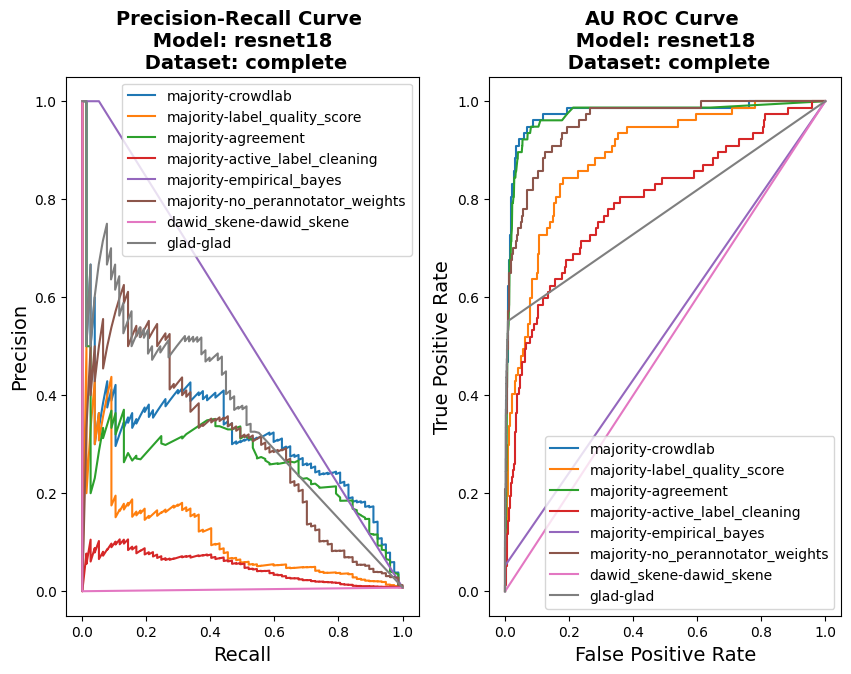

In [23]:
results_complete_resnet = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, methods, "resnet18", "complete")

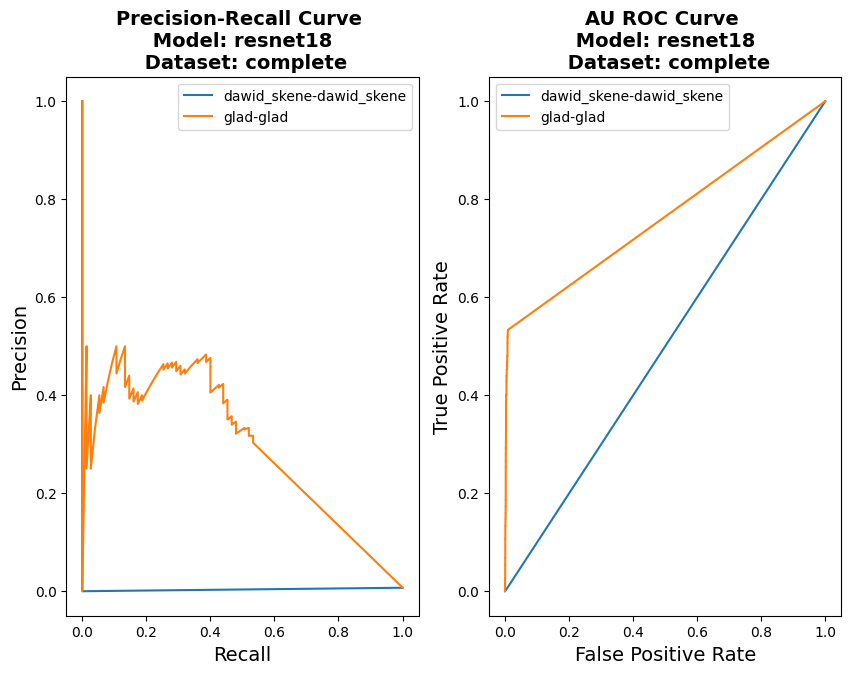

In [24]:
model_labels = np.argmax(pred_probs_resnet18, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_complete_resnet_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_resnet18, model_methods, "resnet18", "complete")

for res in results_complete_resnet_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

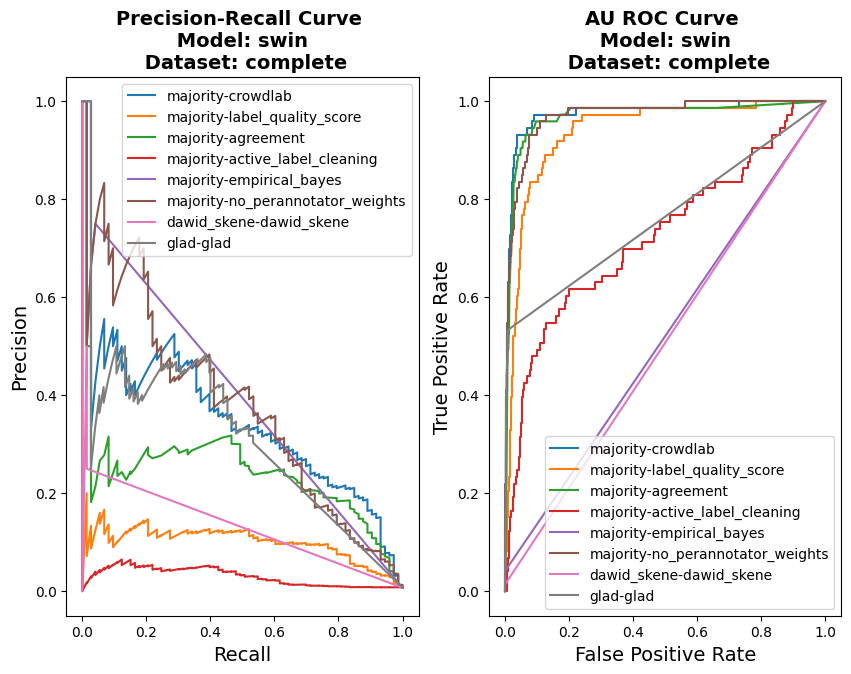

In [25]:
results_complete_swin = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, methods, "swin", "complete")

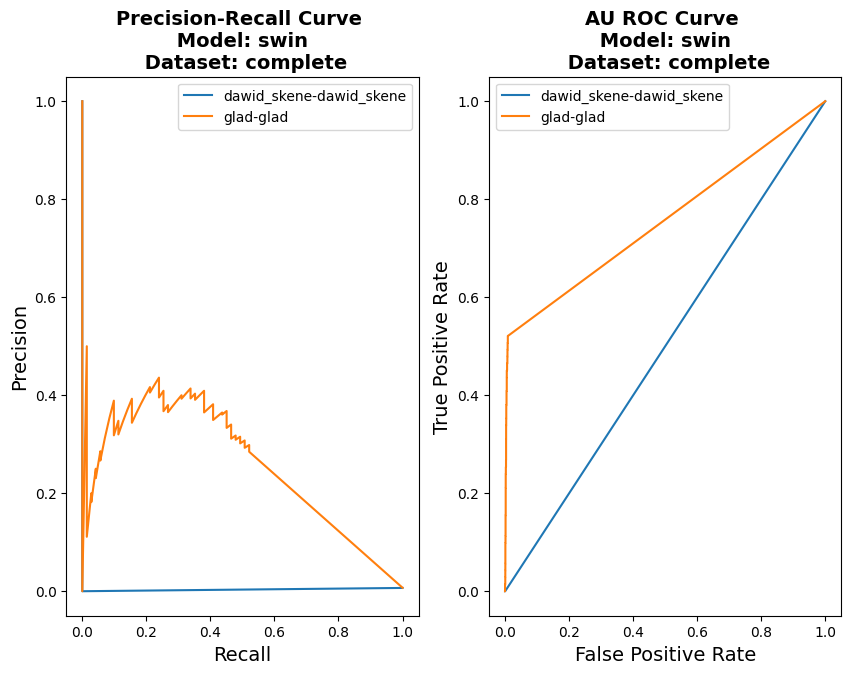

In [26]:
model_labels = np.argmax(pred_probs_swin, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_complete_swin_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_swin, model_methods, "swin", "complete")

for res in results_complete_swin_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

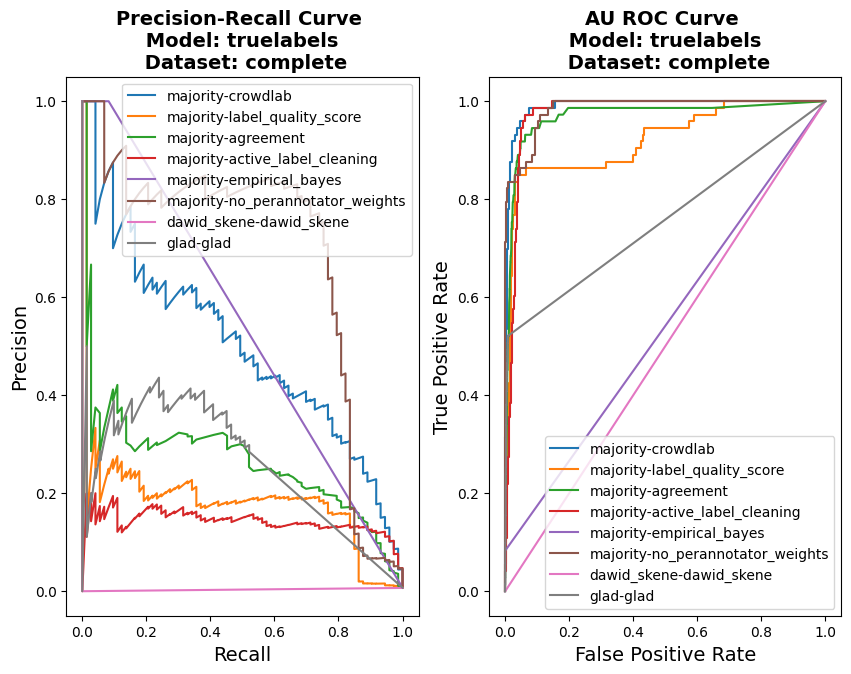

In [27]:
results_complete_truelabels = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, methods, "truelabels", "complete")

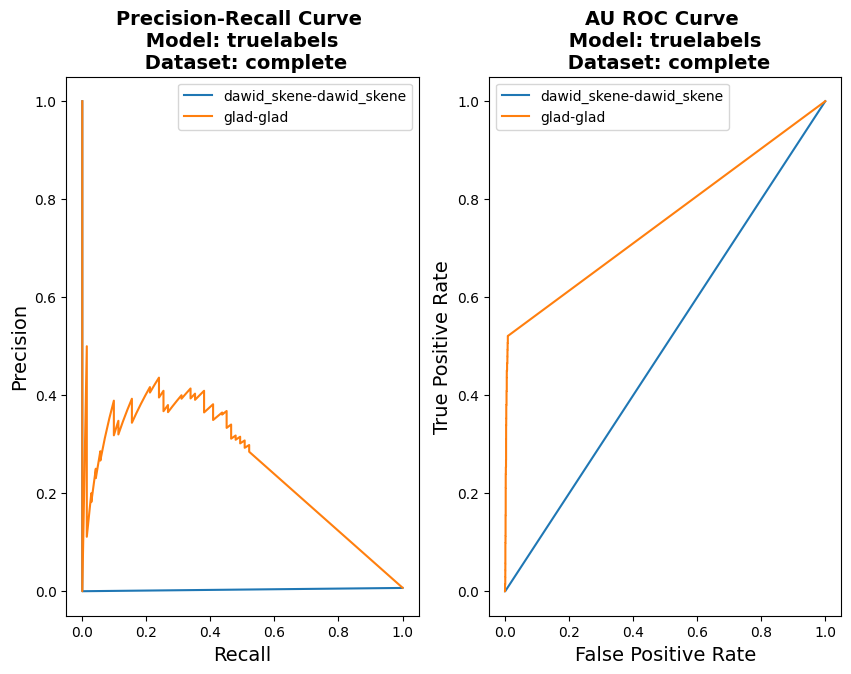

In [28]:
model_labels = np.argmax(pred_probs_swin, axis = 1)
multiannotator_labels = pd.DataFrame(multiannotator_labels)
multiannotator_labels[99999] = model_labels

results_complete_truelabels_model = benchmark_results(multiannotator_labels, true_labels, pred_probs_truelabels, model_methods, "truelabels", "complete")

for res in results_complete_truelabels_model:
    res["consensus_method"] += "_with_model"
    res["quality_method"] += "_with_model"

In [29]:
results_complete = pd.concat(
    [
        pd.DataFrame(results_complete_resnet),
        pd.DataFrame(results_complete_resnet_model),
        pd.DataFrame(results_complete_swin),
        pd.DataFrame(results_complete_swin_model),
        pd.DataFrame(results_complete_truelabels),
        pd.DataFrame(results_complete_truelabels_model),
    ],
    ignore_index=True,
)

results_complete

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,complete,resnet18,majority,crowdlab,0.973945,0.311676,0.9923,0.960141,38.961039,49.350649,44.155844,27.705628,18.441558,9.610390
1,complete,resnet18,majority,label_quality_score,0.887742,0.107233,0.9923,0.953478,38.961039,20.779221,19.480519,13.419913,9.090909,6.363636
2,complete,resnet18,majority,agreement,0.969654,0.266894,0.9923,0.956046,25.974026,33.766234,44.155844,26.406926,17.922078,9.480519
3,complete,resnet18,majority,active_label_cleaning,0.793032,0.048455,0.9923,0.953478,0.000000,10.389610,12.987013,8.658009,8.831169,5.454545
4,complete,resnet18,majority,empirical_bayes,0.525974,0.529624,0.9923,0.957768,51.948052,10.389610,5.194805,1.731602,1.038961,0.519481
5,complete,resnet18,majority,no_perannotator_weights,0.954720,0.296821,0.9923,0.957286,64.935065,54.545455,45.454545,23.376623,14.805195,8.441558
6,complete,resnet18,dawid_skene,dawid_skene,0.499799,0.003650,0.9927,0.962776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,complete,resnet18,glad,glad,0.772114,0.358761,0.9922,0.960208,89.743590,66.666667,47.435897,18.376068,11.025641,5.512821
8,complete,resnet18,dawid_skene_with_model,dawid_skene,0.499748,0.003550,0.9929,0.964781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,complete,resnet18,glad_with_model,glad,0.762902,0.290877,0.9925,0.960383,53.333333,61.333333,46.666667,17.777778,10.666667,5.333333


In [30]:
# pd.DataFrame(results_complete).to_csv("benchmark_results/results_complete.csv", index=False)

### All Results in a Huge DF

In [31]:
results = pd.concat([results_worst, results_uniform, results_complete], ignore_index=True)

In [38]:
results

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,worst_annotators,resnet18,majority,crowdlab,0.944894,0.537992,0.9589,0.721502,24.330900,22.384428,17.761557,14.274128,11.824818,7.761557
1,worst_annotators,resnet18,majority,label_quality_score,0.898247,0.448911,0.9589,0.701059,19.464720,21.411192,19.221411,13.381995,10.218978,6.496350
2,worst_annotators,resnet18,majority,agreement,0.686879,0.147983,0.9589,0.688119,4.866180,5.839416,6.326034,5.271695,4.720195,4.282238
3,worst_annotators,resnet18,majority,active_label_cleaning,0.816071,0.325016,0.9589,0.701059,17.031630,19.951338,16.301703,10.218978,7.883212,5.158151
4,worst_annotators,resnet18,majority,empirical_bayes,0.783923,0.279858,0.9589,0.709135,12.165450,11.678832,12.165450,11.273317,8.564477,4.768856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,complete,truelabels,majority,no_perannotator_weights,0.984001,0.687744,0.9927,0.962167,123.287671,115.068493,78.082192,27.853881,16.986301,9.178082
86,complete,truelabels,dawid_skene,dawid_skene,0.499698,0.003350,0.9933,0.966864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,complete,truelabels,glad,glad,0.756573,0.252457,0.9929,0.962081,28.169014,53.521127,46.478873,17.370892,10.422535,5.211268
88,complete,truelabels,dawid_skene_with_model,dawid_skene,0.499698,0.003350,0.9933,0.966864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# pd.DataFrame(results).to_csv("benchmark_results/results.csv", index=False)